# Informasi Mahasiswa

Nama: Wilda Fahera
NPM: 2108107010026

# Jenis Dataset

Dataset yang digunakan berasal dari web kaggle https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset 

Informasi Dataset:

1. Jumlah baris dan kolom
- Dataset ini memiliki 908 baris.
- Dataset ini memiliki 8 kolom.

2. Nama kolom
Nama kolom dalam dataset ini adalah sebagai berikut:
- Area
- MajorAxisLength
- MinorAxisLength
- Eccentricity
- Extension
- Class

3. Tipe data kolom
Tipe data setiap kolom dalam dataset ini adalah sebagai berikut:
- Area: int64
- MajorAxisLength: float64
- MinorAxisLength: float64
- Eccentricity: float64
- ConvexArea: int64
- Extent: float64
- Perimeter: float64
- Class: object

# Informasi Mahasiswa

Nama: Wilda Fahera
NPM: 2108107010026

# Jenis Dataset

Dataset yang digunakan berasal dari web kaggle https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset 

Informasi Dataset:

1. Jumlah baris dan kolom
- Dataset ini memiliki 908 baris.
- Dataset ini memiliki 8 kolom.

2. Nama kolom
Nama kolom dalam dataset ini adalah sebagai berikut:
- Area
- MajorAxisLength
- MinorAxisLength
- Eccentricity
- Extension
- Class

3. Tipe data kolom
Tipe data setiap kolom dalam dataset ini adalah sebagai berikut:
- Area: int64
- MajorAxisLength: float64
- MinorAxisLength: float64
- Eccentricity: float64
- ConvexArea: int64
- Extent: float64
- Perimeter: float64
- Class: object

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import os
import joblib
import zipfile

seed = 1234
np.random.seed(seed)
plt.style.use('fivethirtyeight')

In [2]:
# Baca dataset
Raisin_df = pd.read_excel("data\Raisin_Dataset.xlsx")
Raisin_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
data = Raisin_df
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


## Preprocessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Dataset ini terdiri dari 900 pengamatan dengan 6 fitur numerik dan 1 fitur untuk kelas yang akan diprediksi. Tidak ada nilai yang hilang dan semua tipe data sudah sesuai, oleh karena itu, kita dapat melanjutkan.

In [5]:
data["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

Ada 2 kelas yang harus diprediksi, yang membuat SVM menjadi pilihan terbaik karena kita hanya perlu melatih satu model dengan angka +1 mewakili salah satu kelas dan angka -1 mewakili kelas lainnya.

In [6]:
data["Class"].value_counts(normalize = True)

Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64

Kelas-kelasnya seimbang dengan baik. Jadi, tidak perlu memberi bobot pada kelas-kelas tersebut dan bisa menggunakan akurasi prediksi sebagai cara untuk mengevaluasi model.

In [7]:
attributes = data.drop('Class', axis='columns')
labels = data['Class']

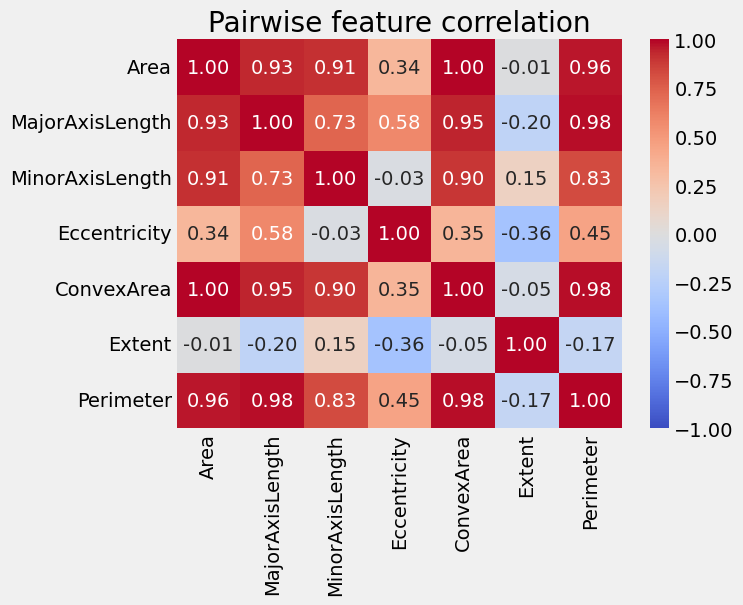

In [8]:
sns.heatmap(attributes.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pairwise feature correlation')
plt.show()

Dari matriks korelasi, terlihat bahwa fitur-fitur dalam dataset saling berkorelasi tinggi. Oleh karena itu, diperlukan untuk menerapkan PCA. Sebelum itu, sampel-sampel perlu dibagi menjadi dataset pelatihan dan pengujian.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    attributes, labels,
    test_size=.2,
    random_state=seed,
    stratify=labels
)

membagi dataset menjadi data pelatihan dan pengujian dengan rasio 80:20

In [10]:
transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ],
    verbose=True
)

X_train_transformed = transformer.fit_transform(X_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.1s


membuat sebuah pipeline yang menskalakan data menggunakan StandardScaler dan kemudian melakukan reduksi dimensi menggunakan PCA. Data pelatihan X_train kemudian diubah menggunakan pipeline tersebut, dan hasilnya disimpan dalam X_train_transformed.

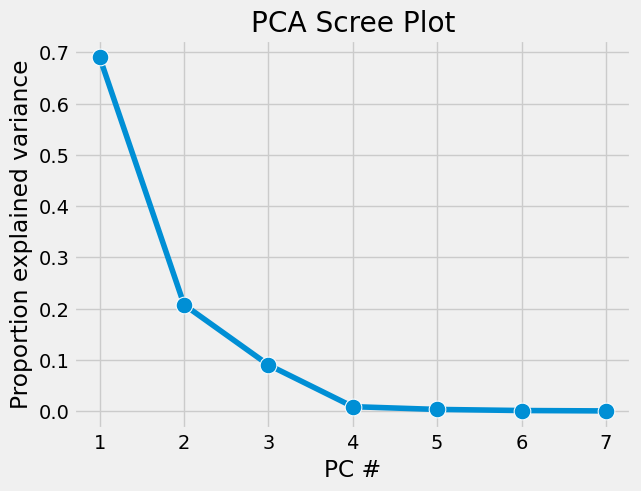

In [11]:
sns.lineplot(
    x=range(1, len(attributes.columns) + 1),
    y=transformer['pca'].explained_variance_ratio_,
    marker='o', markersize=12
)
plt.xlabel('PC #')
plt.ylabel('Proportion explained variance')
plt.title('PCA Scree Plot')
plt.show()

In [12]:
transformer['pca'].explained_variance_ratio_.cumsum()

array([0.69013188, 0.89755108, 0.98746311, 0.99591152, 0.99895984,
       0.99985811, 1.        ])

Grafik scree menunjukkan bahwa sebagian besar varians (98.7%) dijelaskan dengan 3 komponen utama pertama. Oleh karena itu, saya akan menggunakan komponen-komponen tersebut untuk pelatihan.

In [13]:
pca3_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca3', PCA(n_components=3))
    ],
    verbose=True
)

X_train_pca3 = pca3_transformer.fit_transform(X_train)
X_train_pca3_df = pd.DataFrame(X_train_pca3, columns=['PC1', 'PC2', 'PC3'])
X_train_pca3_df.head()

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing pca3, total=   0.0s


,PC1,PC2,PC3
0,-1.072508,-0.226649,-0.063948
1,-0.431220,-0.450306,-0.242493
2,-1.562153,-0.018228,-1.286605
3,-0.952452,-2.368450,0.207826
4,-0.003172,0.197338,-0.947343


In [14]:
loadings = pd.DataFrame(
    pca3_transformer['pca3'].components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=attributes.columns
)
loadings

,PC1,PC2,PC3
Area,0.448316,-0.116730,0.007318
MajorAxisLength,0.443002,0.137617,-0.102205
MinorAxisLength,0.389205,-0.376267,0.233245
Eccentricity,0.203322,0.610149,-0.628882
ConvexArea,0.451017,-0.087528,0.039081
Extent,-0.057340,-0.666941,-0.732266
Perimeter,0.450819,0.033251,0.043183


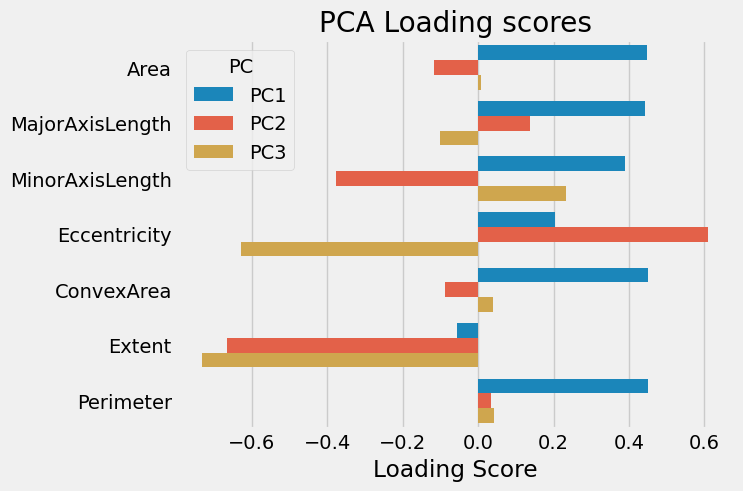

In [15]:
sns.barplot(x='Loading Score', y ='index', hue='PC',
            data=loadings.reset_index().melt(id_vars='index', var_name='PC', value_name='Loading Score')
)
plt.ylabel('')
plt.title('PCA Loading scores')
plt.show()

Ketika membuat plot untuk skor muatan, dapat dilihat bahwa komponen  utamanya menangkap varians dalam fitur yang berkaitan dengan ukuran, yang mengindikasikan bahwa itu adalah fitur paling berguna dari sejenis kismis. PC2 dan PC3 utamanya menangani dua fitur lainnya, yaitu Eksentrisitas dan Rentang. Semua fitur tampaknya berkontribusi terhadap perhitungan komponen utama.

In [16]:
X_test_pca3 = pca3_transformer.transform(X_test)

mentransformasi data pengujian X_test ke dalam dimensi yang lebih rendah menggunakan pipeline transformasi yang sama yang telah dibuat sebelumnya (pca3_transformer). Hal ini memungkinkan konsistensi dalam representasi data antara data pelatihan dan pengujian.

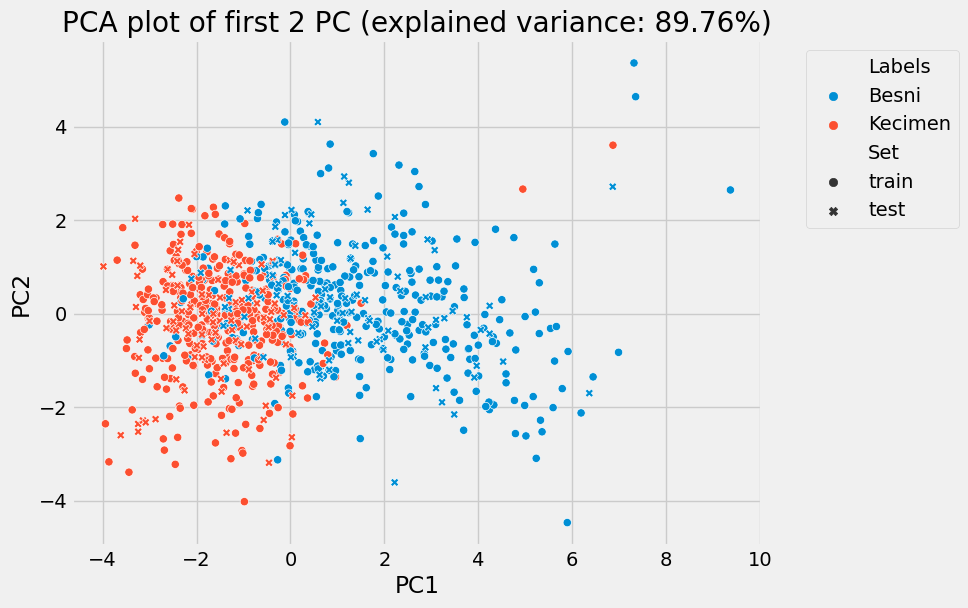

In [17]:
X_test_pca3_df = pd.DataFrame(X_test_pca3, columns=['PC1', 'PC2', 'PC3'])

df = pd.concat([X_train_pca3_df, X_test_pca3_df]).reset_index(drop=True)
df['Labels'] = pd.concat([y_train, y_test]).reset_index(drop=True)
df['Set'] = 'test'
df.loc[X_train_pca3_df.index, 'Set'] = 'train'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Labels', style='Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title(f"PCA plot of first 2 PC (explained variance: {pca3_transformer['pca3'].explained_variance_ratio_[:2].sum() * 100:.2f}%)")
plt.show()

Visualisasi PCA menunjukkan bahwa terdapat dua kelompok yang berbeda dalam dataset, yaitu kelompok "Besni" dan kelompok "Kecimen". Kedua kelompok ini memiliki nilai PC1 dan PC2 yang berbeda secara signifikan.

# Model Training

Untuk melatih SVM linear, diperlukan penyetelan parameter regularisasi C. Untuk melakukan itu, saya menyiapkan pencarian grid yang disesuaikan dengan validasi silang dengan nilai-nilai yang mungkin untuk C.

In [18]:
Cs = [.001, .01, .1, 1, 10]

grid_search = GridSearchCV(
    LinearSVC(dual=False, random_state=seed),
    param_grid={
        "C": Cs
    },
    verbose=1,
    cv=5,
    scoring="accuracy"
)

mencari parameter terbaik C pada model SVM linear menggunakan metode GridSearchCV. Proses ini dilakukan dengan mencoba beberapa nilai yang berbeda untuk C dan menggunakan validasi silang untuk evaluasi kinerja model. Hasilnya akan ditampilkan secara verbal.

In [19]:
pipeline = Pipeline([
    ('transformer', pca3_transformer),
    ('grid_search', grid_search)
])

membuat sebuah pipeline yang terdiri dari dua tahapan: transformasi menggunakan PCA dan pencarian parameter terbaik menggunakan GridSearchCV untuk model SVM linear.

In [20]:
labelEncoder = LabelEncoder()
y_train_encoded = labelEncoder.fit_transform(y_train)
y_test_encoded = labelEncoder.transform(y_test)
list(enumerate(labelEncoder.classes_))

[(0, 'Besni'), (1, 'Kecimen')]

mengonversi label kelas menjadi nilai numerik menggunakan LabelEncoder. Itu kemudian digunakan untuk melatih (fit) dan mengkodekan label pada data pelatihan, serta menerapkan transformasi yang sama pada data pengujian. Hasilnya adalah daftar kelas unik yang telah dikodekan dengan indeksnya.

In [21]:
pipeline.fit(X_train, y_train_encoded)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing pca3, total=   0.0s
Fitting 5 folds for each of 5 candidates, totalling 25 fits


Pipeline(steps=[('transformer',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca3', PCA(n_components=3))],
                          verbose=True)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=LinearSVC(dual=False,
                                                  random_state=1234),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
                              scoring='accuracy', verbose=1))])

In [22]:
pipeline[-1].best_score_

0.861111111111111

In [23]:
pipeline[-1].best_params_

{'C': 1}

Akurasi validasi tertinggi yang diamati adalah 86% menggunakan nilai 1 untuk parameter  C,  yang mengimplikasikan regularisasi yang moderat.

## Model evaluation and discussion

In [24]:
tuned_pipeline = Pipeline([
    ('transformer', pca3_transformer),
    ('SVM', pipeline['grid_search'].best_estimator_)
])

predictions = tuned_pipeline.predict(X_test)

membuat pipeline yang menggabungkan transformer PCA dan model SVM linear dengan parameter terbaik yang telah ditentukan sebelumnya melalui GridSearchCV. Pipeline ini kemudian digunakan untuk membuat prediksi pada data pengujian X_test.

In [25]:
print(classification_report(y_true=y_test_encoded, y_pred=predictions, target_names=labelEncoder.classes_))

              precision    recall  f1-score   support

       Besni       0.93      0.83      0.88        90
     Kecimen       0.85      0.93      0.89        90

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



Mirip dengan akurasi validasi, model mencapai akurasi pengujian sebesar 88%. Hal tersebut sangat menunjukkan bahwa model berhasil belajar  dengan baik dan tidak mengalami overfitting pada data pelatihan.

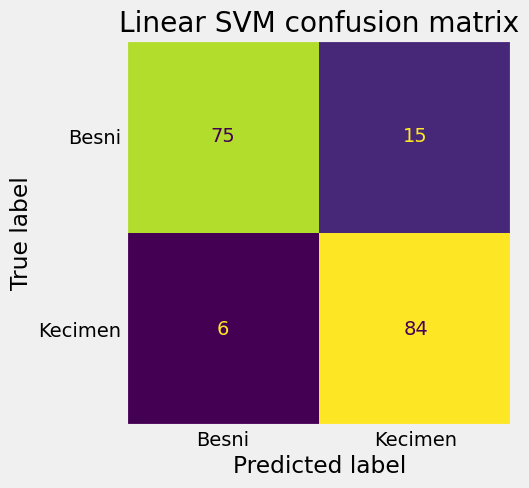

In [26]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test_encoded,
    y_pred=predictions,
    display_labels=labelEncoder.classes_,
    colorbar=False
)
plt.grid(False)
plt.tight_layout()
plt.title('Linear SVM confusion matrix')
plt.show()

Dengan mengamati kesalahan model, terlihat bahwa model lebih sering salah mengklasifikasikan kismis Besni.

# Visualisasi

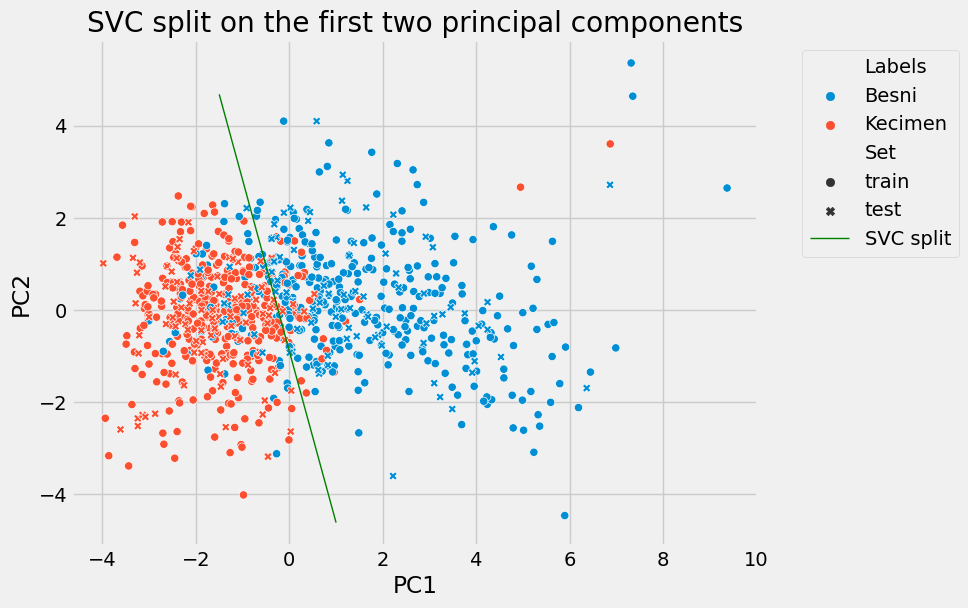

In [27]:
w, b = tuned_pipeline[-1].coef_[0], tuned_pipeline[-1].intercept_[0]
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='PC1', y='PC2', hue='Labels', style='Set')

line_legend = plt.Line2D([], [], color='g', linewidth=1, label='SVC split')

handles, labels = scatter.get_legend_handles_labels()
handles.append(line_legend)
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.title('SVC split on the first two principal components')

x_points = np.linspace(-1.5, 1)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='g', linewidth=1)

plt.show()

Di sini, pembagian SVM dari dua komponen utama pertama divisualisasikan. Visualisasi menunjukkan bahwa SVM mampu memisahkan data "train" dan "test" dengan baik menggunakan dua komponen utama pertama sebagai fitur.

## Import Library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import os
import joblib
import zipfile

seed = 1234
np.random.seed(seed)
plt.style.use('fivethirtyeight')

In [29]:
# Baca dataset
Raisin_df = pd.read_excel("data\Raisin_Dataset.xlsx")
Raisin_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [30]:
data = Raisin_df
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


## Preprocessing Data

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


Dataset ini terdiri dari 900 pengamatan dengan 6 fitur numerik dan 1 fitur untuk kelas yang akan diprediksi. Tidak ada nilai yang hilang dan semua tipe data sudah sesuai, oleh karena itu, kita dapat melanjutkan.

In [32]:
data["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

Ada 2 kelas yang harus diprediksi, yang membuat SVM menjadi pilihan terbaik karena kita hanya perlu melatih satu model dengan angka +1 mewakili salah satu kelas dan angka -1 mewakili kelas lainnya.

In [33]:
data["Class"].value_counts(normalize = True)

Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64

Kelas-kelasnya seimbang dengan baik. Jadi, tidak perlu memberi bobot pada kelas-kelas tersebut dan bisa menggunakan akurasi prediksi sebagai cara untuk mengevaluasi model.

In [34]:
attributes = data.drop('Class', axis='columns')
labels = data['Class']

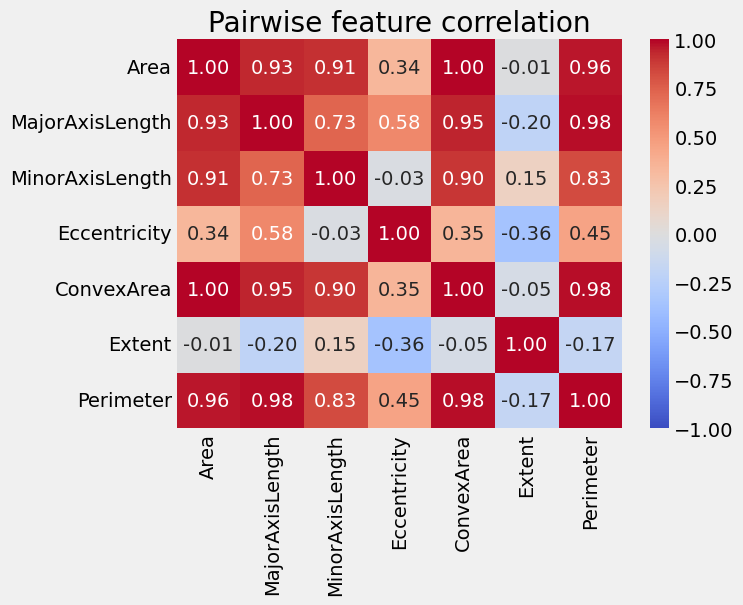

In [35]:
sns.heatmap(attributes.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pairwise feature correlation')
plt.show()

Dari matriks korelasi, terlihat bahwa fitur-fitur dalam dataset saling berkorelasi tinggi. Oleh karena itu, diperlukan untuk menerapkan PCA. Sebelum itu, sampel-sampel perlu dibagi menjadi dataset pelatihan dan pengujian.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    attributes, labels,
    test_size=.2,
    random_state=seed,
    stratify=labels
)

membagi dataset menjadi data pelatihan dan pengujian dengan rasio 80:20

In [37]:
transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA())
    ],
    verbose=True
)

X_train_transformed = transformer.fit_transform(X_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.0s


membuat sebuah pipeline yang menskalakan data menggunakan StandardScaler dan kemudian melakukan reduksi dimensi menggunakan PCA. Data pelatihan X_train kemudian diubah menggunakan pipeline tersebut, dan hasilnya disimpan dalam X_train_transformed.

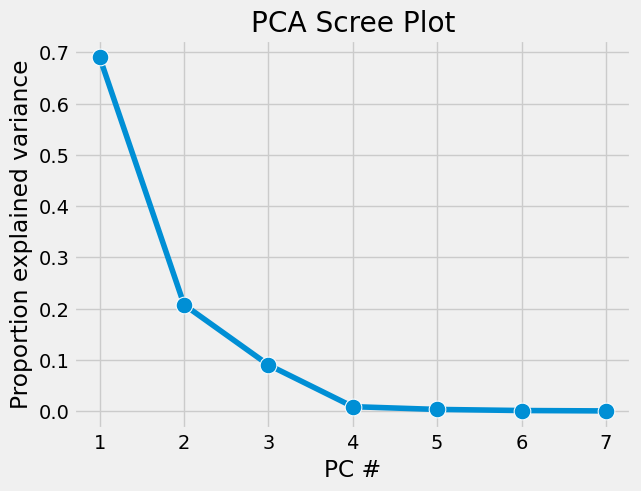

In [38]:
sns.lineplot(
    x=range(1, len(attributes.columns) + 1),
    y=transformer['pca'].explained_variance_ratio_,
    marker='o', markersize=12
)
plt.xlabel('PC #')
plt.ylabel('Proportion explained variance')
plt.title('PCA Scree Plot')
plt.show()

In [39]:
transformer['pca'].explained_variance_ratio_.cumsum()

array([0.69013188, 0.89755108, 0.98746311, 0.99591152, 0.99895984,
       0.99985811, 1.        ])

Grafik scree menunjukkan bahwa sebagian besar varians (98.7%) dijelaskan dengan 3 komponen utama pertama. Oleh karena itu, saya akan menggunakan komponen-komponen tersebut untuk pelatihan.

In [40]:
pca3_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('pca3', PCA(n_components=3))
    ],
    verbose=True
)

X_train_pca3 = pca3_transformer.fit_transform(X_train)
X_train_pca3_df = pd.DataFrame(X_train_pca3, columns=['PC1', 'PC2', 'PC3'])
X_train_pca3_df.head()

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing pca3, total=   0.0s


,PC1,PC2,PC3
0,-1.072508,-0.226649,-0.063948
1,-0.431220,-0.450306,-0.242493
2,-1.562153,-0.018228,-1.286605
3,-0.952452,-2.368450,0.207826
4,-0.003172,0.197338,-0.947343


In [41]:
loadings = pd.DataFrame(
    pca3_transformer['pca3'].components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=attributes.columns
)
loadings

,PC1,PC2,PC3
Area,0.448316,-0.116730,0.007318
MajorAxisLength,0.443002,0.137617,-0.102205
MinorAxisLength,0.389205,-0.376267,0.233245
Eccentricity,0.203322,0.610149,-0.628882
ConvexArea,0.451017,-0.087528,0.039081
Extent,-0.057340,-0.666941,-0.732266
Perimeter,0.450819,0.033251,0.043183


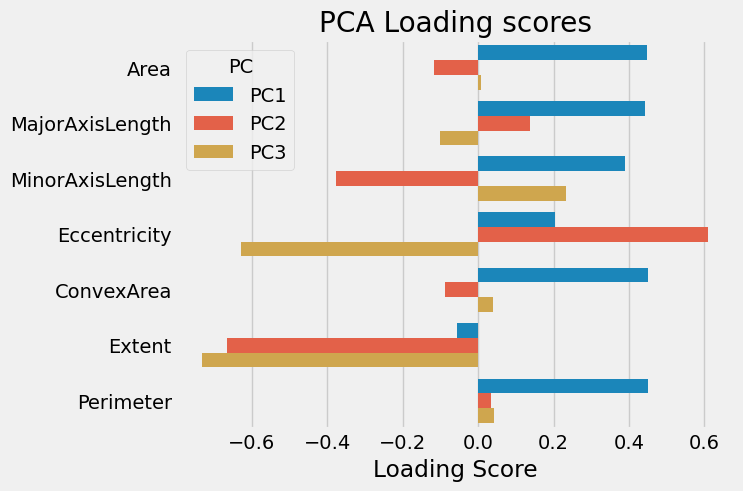

In [42]:
sns.barplot(x='Loading Score', y ='index', hue='PC',
            data=loadings.reset_index().melt(id_vars='index', var_name='PC', value_name='Loading Score')
)
plt.ylabel('')
plt.title('PCA Loading scores')
plt.show()

Ketika membuat plot untuk skor muatan, dapat dilihat bahwa komponen  utamanya menangkap varians dalam fitur yang berkaitan dengan ukuran, yang mengindikasikan bahwa itu adalah fitur paling berguna dari sejenis kismis. PC2 dan PC3 utamanya menangani dua fitur lainnya, yaitu Eksentrisitas dan Rentang. Semua fitur tampaknya berkontribusi terhadap perhitungan komponen utama.

In [43]:
X_test_pca3 = pca3_transformer.transform(X_test)

mentransformasi data pengujian X_test ke dalam dimensi yang lebih rendah menggunakan pipeline transformasi yang sama yang telah dibuat sebelumnya (pca3_transformer). Hal ini memungkinkan konsistensi dalam representasi data antara data pelatihan dan pengujian.

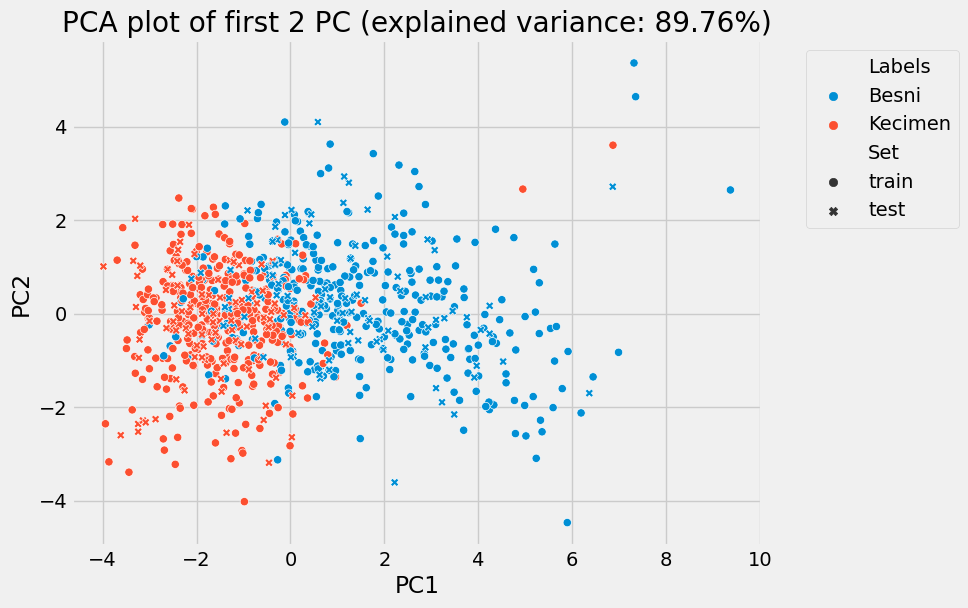

In [44]:
X_test_pca3_df = pd.DataFrame(X_test_pca3, columns=['PC1', 'PC2', 'PC3'])

df = pd.concat([X_train_pca3_df, X_test_pca3_df]).reset_index(drop=True)
df['Labels'] = pd.concat([y_train, y_test]).reset_index(drop=True)
df['Set'] = 'test'
df.loc[X_train_pca3_df.index, 'Set'] = 'train'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Labels', style='Set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title(f"PCA plot of first 2 PC (explained variance: {pca3_transformer['pca3'].explained_variance_ratio_[:2].sum() * 100:.2f}%)")
plt.show()

Visualisasi PCA menunjukkan bahwa terdapat dua kelompok yang berbeda dalam dataset, yaitu kelompok "Besni" dan kelompok "Kecimen". Kedua kelompok ini memiliki nilai PC1 dan PC2 yang berbeda secara signifikan.

# Model Training

Untuk melatih SVM linear, diperlukan penyetelan parameter regularisasi C. Untuk melakukan itu, saya menyiapkan pencarian grid yang disesuaikan dengan validasi silang dengan nilai-nilai yang mungkin untuk C.

In [45]:
Cs = [.001, .01, .1, 1, 10]

grid_search = GridSearchCV(
    LinearSVC(dual=False, random_state=seed),
    param_grid={
        "C": Cs
    },
    verbose=1,
    cv=5,
    scoring="accuracy"
)

mencari parameter terbaik C pada model SVM linear menggunakan metode GridSearchCV. Proses ini dilakukan dengan mencoba beberapa nilai yang berbeda untuk C dan menggunakan validasi silang untuk evaluasi kinerja model. Hasilnya akan ditampilkan secara verbal.

In [46]:
pipeline = Pipeline([
    ('transformer', pca3_transformer),
    ('grid_search', grid_search)
])

membuat sebuah pipeline yang terdiri dari dua tahapan: transformasi menggunakan PCA dan pencarian parameter terbaik menggunakan GridSearchCV untuk model SVM linear.

In [47]:
labelEncoder = LabelEncoder()
y_train_encoded = labelEncoder.fit_transform(y_train)
y_test_encoded = labelEncoder.transform(y_test)
list(enumerate(labelEncoder.classes_))

[(0, 'Besni'), (1, 'Kecimen')]

mengonversi label kelas menjadi nilai numerik menggunakan LabelEncoder. Itu kemudian digunakan untuk melatih (fit) dan mengkodekan label pada data pelatihan, serta menerapkan transformasi yang sama pada data pengujian. Hasilnya adalah daftar kelas unik yang telah dikodekan dengan indeksnya.

In [48]:
pipeline.fit(X_train, y_train_encoded)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .............. (step 2 of 2) Processing pca3, total=   0.0s
Fitting 5 folds for each of 5 candidates, totalling 25 fits


Pipeline(steps=[('transformer',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca3', PCA(n_components=3))],
                          verbose=True)),
                ('grid_search',
                 GridSearchCV(cv=5,
                              estimator=LinearSVC(dual=False,
                                                  random_state=1234),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
                              scoring='accuracy', verbose=1))])

In [49]:
pipeline[-1].best_score_

0.861111111111111

In [50]:
pipeline[-1].best_params_

{'C': 1}

Akurasi validasi tertinggi yang diamati adalah 86% menggunakan nilai 1 untuk parameter  C,  yang mengimplikasikan regularisasi yang moderat.

## Model evaluation and discussion

In [51]:
tuned_pipeline = Pipeline([
    ('transformer', pca3_transformer),
    ('SVM', pipeline['grid_search'].best_estimator_)
])

predictions = tuned_pipeline.predict(X_test)

membuat pipeline yang menggabungkan transformer PCA dan model SVM linear dengan parameter terbaik yang telah ditentukan sebelumnya melalui GridSearchCV. Pipeline ini kemudian digunakan untuk membuat prediksi pada data pengujian X_test.

In [52]:
print(classification_report(y_true=y_test_encoded, y_pred=predictions, target_names=labelEncoder.classes_))

              precision    recall  f1-score   support

       Besni       0.93      0.83      0.88        90
     Kecimen       0.85      0.93      0.89        90

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



Mirip dengan akurasi validasi, model mencapai akurasi pengujian sebesar 88%. Hal tersebut sangat menunjukkan bahwa model berhasil belajar  dengan baik dan tidak mengalami overfitting pada data pelatihan.

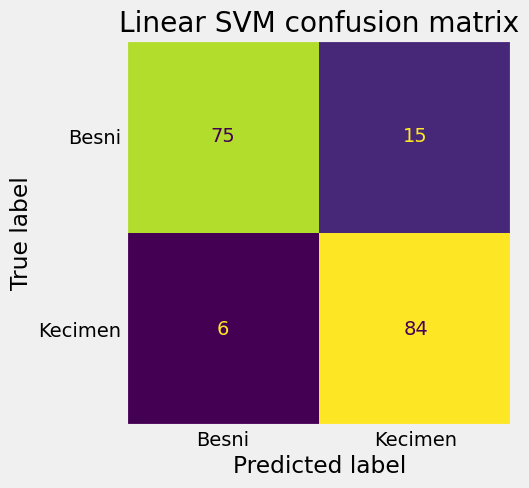

In [53]:
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test_encoded,
    y_pred=predictions,
    display_labels=labelEncoder.classes_,
    colorbar=False
)
plt.grid(False)
plt.tight_layout()
plt.title('Linear SVM confusion matrix')
plt.show()

Dengan mengamati kesalahan model, terlihat bahwa model lebih sering salah mengklasifikasikan kismis Besni.

# Visualisasi

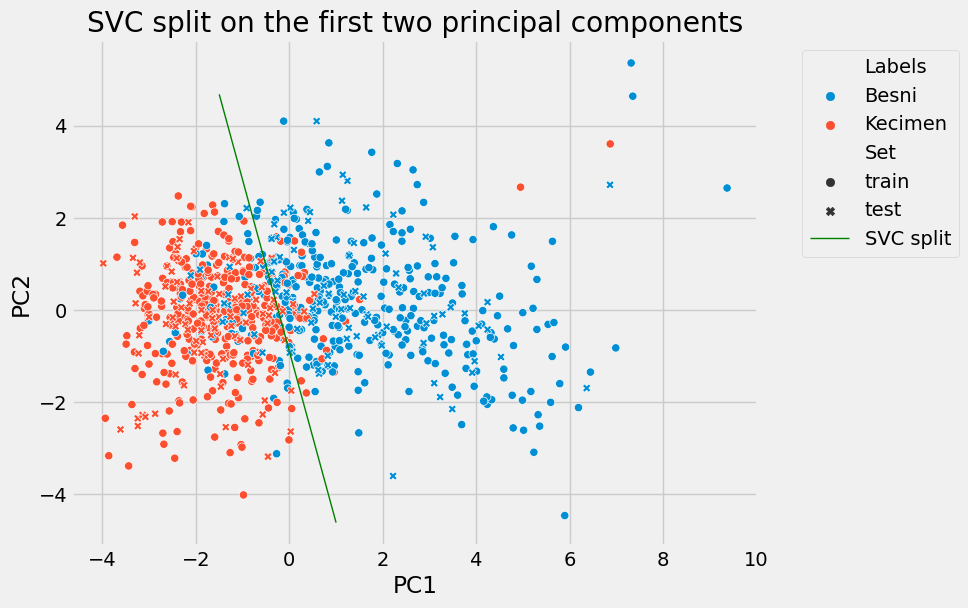

In [54]:
w, b = tuned_pipeline[-1].coef_[0], tuned_pipeline[-1].intercept_[0]
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='PC1', y='PC2', hue='Labels', style='Set')

line_legend = plt.Line2D([], [], color='g', linewidth=1, label='SVC split')

handles, labels = scatter.get_legend_handles_labels()
handles.append(line_legend)
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.title('SVC split on the first two principal components')

x_points = np.linspace(-1.5, 1)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='g', linewidth=1)

plt.show()

Di sini, pembagian SVM dari dua komponen utama pertama divisualisasikan. Visualisasi menunjukkan bahwa SVM mampu memisahkan data "train" dan "test" dengan baik menggunakan dua komponen utama pertama sebagai fitur.